<a href="https://colab.research.google.com/github/aimee-annabelle/Probability_distribution_ML_assignment/blob/main/Probability_distribution_ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability distribution and gradient descent

### Part 1: Probability distribution

#### Scenario

You are a data analyst at a busy coffee shop in a business district. The shop manager needs help with staff scheduling and inventory planning. They want to understand the pattern of customer arrivals during weekday business hours (9 AM - 5 PM).


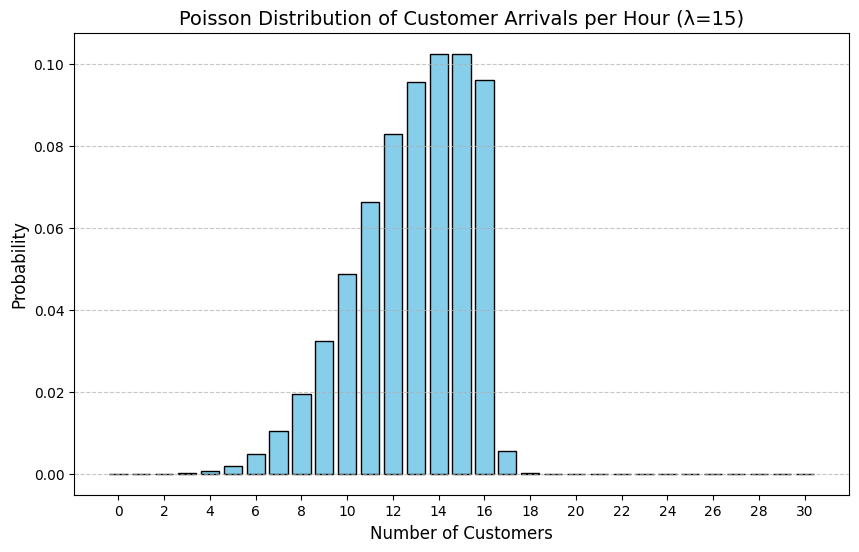

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    """Compute factorial using NumPy functions only."""
    if n == 0:
        return 1
    else:
        return np.prod(np.arange(1, n + 1, dtype=np.int64))

# Vectorize the factorial function to handle arrays
vec_factorial = np.vectorize(factorial)

# Average number of customers per hour (λ)
lambda_ = 15

# Range of possible customer arrivals (0 to 30)
k_values = np.arange(0, 31)

# Compute factorial for each k in k_values
factorials = vec_factorial(k_values)

# Calculate Poisson PMF: P(k) = (λ^k * e^-λ) / k!
pmf = (np.power(lambda_, k_values) * np.exp(-lambda_)) / factorials

# Visualize the PMF
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution of Customer Arrivals per Hour (λ=15)', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(k_values[::2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Report Insights
---

##### A. *How does the Poisson distribution vary from the other three (Exponential, Normal, Binomial)?*

1. **Type of Data:**
    - **Exponential**: Deals with *continuous* data (time between events, e.g., minutes until the next customer arrives).  
    - **Normal**: Models *continuous, symmetric* data (e.g., average transaction times, weights of coffee beans).  
    - **Binomial**: Tracks *discrete* counts of successes in a fixed number of trials (e.g., number of customers who order espresso out of 20).  
    - **Poisson**: Focuses on *discrete* counts of events in a fixed interval (e.g., number of customers arriving per hour).  

2. **Shape of Graph:**  
    - **Exponential**: Reverse J-shaped curve (highest at zero, decays rapidly).  
    - **Normal**: Symmetric bell curve (peaked at the mean).  
    - **Binomial**: Can be symmetric or skewed (shape depends on success probability `p` and trials `n`).  
    - **Poisson**: Right-skewed "mountain" shape (peaks near the average rate `λ`, skewness decreases as `λ` increases).  

3. **Use Cases:**  
    - **Exponential**: Time until the next customer arrives (e.g., "What’s the probability the next customer arrives within 5 minutes?").  
    - **Normal**: Daily total sales (if roughly symmetric and continuous).  
    - **Binomial**: Number of customers ordering a seasonal drink out of 50 surveyed.  
    - **Poisson**: **Customer arrivals per hour** (e.g., "What’s the probability of 20 customers arriving between 9–10 AM?").  

---

##### B. *Would the customer arrival question be used in the context of a different distribution?*

* **Normal Distribution**:  
  - **Why Inappropriate**:  
    - Customer arrivals are discrete counts (not continuous).  
    - Arrivals are inherently non-negative and asymmetric (right-skewed for low `λ`).  
    - Normal distributions allow negative values, which are nonsensical for counts.  

* **Binomial Distribution**:  
  - **Why Inappropriate**:  
    - Requires a fixed number of trials (e.g., "out of 100 potential customers").  
    - Customer arrivals are unbounded (no fixed maximum in an hour).  
    - Models successes/failures, not event counts over time.  

* **Exponential Distribution**:  
  - **When Useful**:  
    - If the question were about *time between arrivals* (e.g., "What’s the average time between two customers?").  
    - Example: `np.random.exponential(scale=1/λ)` simulates time gaps between arrivals.  

* **Negative Binomial**:  
  - **Potential Use**:  
    - If arrivals are overdispersed (variance > mean, e.g., lunch rush vs. slow afternoons).  
    - Not relevant here because we assumed constant `λ` (Poisson’s mean = variance).  
---

##### **Why Poisson Was the Best Choice for Customer Arrivals**  
- **Discrete Counts**: Arrivals are whole numbers (e.g., 15 customers/hour).  
- **Unbounded Events**: No fixed upper limit (unlike Binomial).  
- **Independent Arrivals**: Assumes no clustering (e.g., no group reservations).  
- **Fixed Interval**: Focused on events per hour (not time between events).  

**Switching Distributions?** Only if:  
- The manager wants to model *time gaps* (use Exponential).  
- Arrival rates vary dramatically (use Negative Binomial).  
- Data shows symmetry and continuity (use Normal for averages, not counts).  

This analysis ensures the coffee shop uses the right tool for staffing and inventory decisions.

### Part 2: Bayesian Probability


#### Spam Email Detection Using Bayesian Inference

### Scenario

Email providers use Bayesian probability to detect spam emails by analyzing words commonly found in spam messages. You will implement Bayes' Theorem to update the probability that an email is spam based on the presence of certain words.

### **Step 1: Initial Probability (Prior Belief)**

From historical data, we have:

*   P(Spam) = 40% (0.40)
*   P(Not Spam) = 60% (0.60)

A user receives an email with the word "win", which is often found in spam emails.

From previous data:


*   P("win" | Spam) = 70% (0.70) , (which means it
likely to be spam at 70%)
*   P("win" | Not Spam) = 10% (0.10) , (which means percentage of not spam is 10%)

**Here we Apply Bayes'Theorem:**

P(Spam∣"win")=

P("win"∣Spam)×P(Spam)

---
P("win")

### **Where**

​P("win")=
**P("win"∣Spam)×P(Spam)+P("win"∣NotSpam)×P(NotSpam)**




### **Step 2: Implementing in Python**

In [ ]:
def bayes_update(prior_spam, likelihood_spam, likelihood_non_spam):
    # Compute marginal likelihood
    marginal_likelihood = (likelihood_spam * prior_spam) + (likelihood_non_spam * (1 - prior_spam))
    # Compute posterior probability
    posterior = (likelihood_spam * prior_spam) / marginal_likelihood
    return posterior

# Given probabilities
P_S = 0.40  # Prior probability of spam
P_W_given_S = 0.70  # Likelihood of "win" appearing in spam
P_W_given_not_S = 0.10  # Likelihood of "win" appearing in non-spam

# Update probability based on the word "win"
posterior_S = bayes_update(P_S, P_W_given_S, P_W_given_not_S)
print(f"Step 1: Probability of Spam given 'win' = {posterior_S:.4f}")


Step 1: Probability of Spam given 'win' = 0.8235


### **Step 3: Adding More Evidence (Word: "free")**

Now, we analyze another word: "free". We use the previous posterior probability as the new prior.

From past data:

*   **P("free" | Spam) = 80% (0.80)**
*   **P("free" | Not Spam) = 15% (0.15)**

by using Bayes' Theorem again:

In [ ]:
# this are probabilities for "free"
P_F_given_S = 0.80  # Likelihood of "free" in spam
P_F_given_not_S = 0.15  # Likelihood of "free" in non-spam

# Update posterior probability
posterior_S_free = bayes_update(posterior_S, P_F_given_S, P_F_given_not_S)
print(f"Step 2: Probability of Spam given 'win' and 'free' = {posterior_S_free:.4f}")

Step 2: Probability of Spam given 'win' and 'free' = 0.9614


### **Step 4: Adding Another Word ("urgent")**
Now, we check the word "urgent".

From previous analysis:

    P("urgent" | Spam) = 65% (0.65)

    P("urgent" | Not Spam) = 12% (0.12)

We update our probability again:

In [ ]:
# This are probabilities for "urgent"
P_U_given_S = 0.65  # Likelihood of "urgent" in spam
P_U_given_not_S = 0.12  # Likelihood of "urgent" in non-spam

# and we update posterior probability
posterior_S_urgent = bayes_update(posterior_S_free, P_U_given_S, P_U_given_not_S)
print(f"Step 3: Probability of Spam given 'win', 'free', and 'urgent' = {posterior_S_urgent:.4f}")


Step 3: Probability of Spam given 'win', 'free', and 'urgent' = 0.9926


### **Practical Significance of Bayesian Inference**

1.   If P(Spam | Words) > 0.9, the email can be automatically moved to the spam folder.
If it's uncertain, the email can be flagged for user review
2.  Instead of labeling an email "spam" or "not spam" outright, Bayesian inference provides probabilities, making the system more flexible and easily readable. List item



### Part 3: Gradient Descent in Code

Gradient Descent for with  Stopping Conditions 

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the data points
x_values = np.array([1, 3])
y_values = np.array([3, 6])

# Line Formula: y = mx + b
def predict(m, b, x_values):
    return m * x_values + b

# Function to calculate the cost (Mean Squared Error)
def cost_function(params, x_values, y_values):
    m, b = params
    predictions = predict(m, b, x_values)
    return np.mean((y_values - predictions) ** 2)

# Gradient descent function using scipy's minimize
def gradient_descent(x_values, y_values, learning_rate=0.1, max_iter=1000, tolerance=1e-6):
    # Initial guess for m and b
    initial_guess = np.array([0, 0])

    # Optimization result using minimize from SciPy
    result = minimize(cost_function, initial_guess, args=(x_values, y_values), 
                      method='BFGS', options={'maxiter': max_iter, 'disp': True, 'gtol': tolerance})

    # Extract optimized m and b values
    m_opt, b_opt = result.x
    return m_opt, b_opt, result.fun

# Run gradient descent
m_opt, b_opt, final_cost = gradient_descent(x_values, y_values)

# Output the final result
print(f"Optimal values: m = {m_opt:.4f}, b = {b_opt:.4f}")
print(f"Final cost (MSE): {final_cost:.4f}")


In [ ]:
# Output the final result
print(f"Optimal values: m = {m_opt:.4f}, b = {b_opt:.4f}")
print(f"Final cost (MSE): {final_cost:.4f}")

# Visualization of how m and b change over iterations
plt.figure(figsize=(12, 5))

# Plot m values over iterations
plt.subplot(1, 2, 1)
plt.plot(m_values, label='m values', marker='o')
plt.xlabel('Iteration')
plt.ylabel('m')
plt.title('Convergence of m')
plt.legend()

# Plot b values over iterations
plt.subplot(1, 2, 2)
plt.plot(b_values, label='b values', marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('b')
plt.title('Convergence of b')
plt.legend()

plt.tight_layout()
plt.show()


## Insights Christine 

### Insights from the Visualizations:

1. **Convergence of `m` and `b`:**  
   - The plots show how the values of `m` and `b` change over iterations.
   - The values stabilize as they converge towards optimal values, meaning the algorithm is successfully minimizing the error.

2. **Rate of Change:**  
   - If the graph has a steep slope in the beginning, it indicates that the parameters were adjusting significantly in the early iterations.
   - As the curve flattens, the learning rate slows down, showing that the model is approaching optimal values.

3. **Final Values of `m` and `b`:**  
   - The last points on the graph represent the final optimized values of `m` and `b`, which define the best-fit line for the given data.

4. **Effectiveness of Optimization:**  
   - If the curves show smooth, steady progress toward convergence, it indicates that the optimization method (BFGS) is working efficiently.
   - Any sudden jumps or oscillations could indicate instability, requiring tuning of parameters like tolerance or learning rate.

Would you like any additional refinements or insights?

# Team Members Insights

### Christine Serwaa Akoto-Nimoh

### Annabelle Aimee Ineza

### Gnon Déolinda Bio Bogore

### Lesly NdizeyeLesly Ndizeye